In [1]:
!pip install requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Collect

In [ ]:
from requests import session
from bs4 import BeautifulSoup
import json
s = session()
stopRes = ")]}'\n[null,null,null,"

counter = 0
pagetext = ""
url = 'https://www.google.com/maps/preview/review/listentitiesreviews?authuser=0&hl=en&gl=us&authuser=0&pb=!1m2!1y9803822556368847767!2y6926521177900741057!2m2!1i{}0!2i10!3sCAESBkVnSUlDZw%3D%3D!3e1!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1snWtwY92JGp2optQPxN6k-As!7e81'
pretext = ')]}\''
r = s.get(url.format(pagetext)).text
r = r.replace(pretext,' ')
soup = json.loads(r)
review_list = soup[2]
comment = []
rate = []
for i in review_list:
  rate.append(str(i[4]))
  comment.append(str(i[3]))
for a in range(145):
  counter = counter + 1
  pagetext = str(counter)
  r = s.get(url.format(pagetext)).text
  r = r.replace(pretext,' ')
  soup = json.loads(r)
  review_list = soup[2]
  for i in review_list:
    if str(i[3])!="None":
      rate.append(str(i[4]))
      comment.append(str(i[3]))



In [ ]:
import pandas as pd
data = {
    "rate": rate,
    "comment": comment
}
df = pd.DataFrame(data)

In [ ]:
df.to_csv('data.csv')

In [ ]:
df1 = pd.read_csv("/content/Portillo_2_data.csv")
df2 = pd.read_csv("/content/Portillo_1_data.csv")
df3 = pd.read_csv("/content/RPM_data.csv")
df4 = pd.read_csv("/content/XOCO_data.csv")
df5 = pd.read_csv("/content/blackdog_data.csv")
df6 = pd.read_csv("/content/purplepig_data.csv")
df7 = pd.read_csv("/content/texasroadhouse_data.csv")
print(df1)

      Unnamed: 0  rate                                            comment
0              0     4  Had a chance to visit this Iconic Hot Dog Esta...
1              1     5  I really liked this place. There are really lo...
2              2     4  The seasonal salted caramel shake was deliciou...
3              3     4  This is one of those places you are told to go...
4              4     5  The chocolate cake was my absolute favorite de...
...          ...   ...                                                ...
1455        1455     3  The food is pretty good but we ordered four it...
1456        1456     5  Best hot dogs in the world!!! Chicago should b...
1457        1457     1  Slow and unorganized carry out process. Got or...
1458        1458     3  Meh....anticlimactic...a bit confusing having ...
1459        1459     4  Hot dogs are bomb, chocolate shake and fries t...

[1460 rows x 3 columns]


Data Append

In [ ]:
result = df1.append(df2)
print(result)

      Unnamed: 0  rate                                            comment
0              0     4  Had a chance to visit this Iconic Hot Dog Esta...
1              1     5  I really liked this place. There are really lo...
2              2     4  The seasonal salted caramel shake was deliciou...
3              3     4  This is one of those places you are told to go...
4              4     5  The chocolate cake was my absolute favorite de...
...          ...   ...                                                ...
1455        1455     4  My favorite place for hot dogs! Friends from c...
1456        1456     1  Was super excited to order, but they forgot al...
1457        1457     3  Came here because of the reputation of the res...
1458        1458     2  Food was okay, milkshake was good, and the foo...
1459        1459     5             Best polish sausage 🌭🌭🌭 in the galaxy💯

[2920 rows x 3 columns]


In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7]
df = pd.concat(frames,ignore_index = True)
df = df.drop('Unnamed: 0', axis = 1)
df.to_csv('data.csv')

In [2]:
import pandas as pd
google_comment_df = pd.read_csv('/content/drive/MyDrive/data_labeled.csv', index_col =0,encoding='utf-8-sig')

Data Summary

In [3]:
google_comment_df

,comment,status
0,Had a chance to visit this Iconic Hot Dog Esta...,1
1,I really liked this place. There are really lo...,1
2,The seasonal salted caramel shake was deliciou...,1
3,This is one of those places you are told to go...,1
4,The chocolate cake was my absolute favorite de...,1
...,...,...
10215,Great but noisy,1
10216,Texas Road House was not on yesterday,0
10217,my favorite place in the whole world,1
10218,Exellent service and food,1


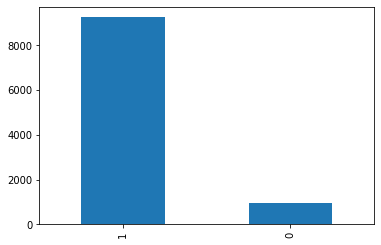

In [4]:
google_comment_df['status'].value_counts().plot(kind='bar')

Model Training - bert

In [5]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(google_comment_df, test_size = 0.2, random_state = 927)

In [6]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 33.0 MB/s 
     |████████████████████████████████| 1.9 MB 70.4 MB/s 
     |████████████████████████████████| 9.2 MB 60.8 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 451 kB 72.4 MB/s 
     |████████████████████████████████| 5.8 MB 71.1 MB/s 
     |████████████████████████████████| 1.3 MB 66.4 MB/s 
     |████████████████████████████████| 7.6 MB 58.1 MB/s 
     |████████████████████████████████| 182 kB 82.4 MB/s 
     |████████████████████████████████| 168 kB 76.3 MB/s 
     |████████████████████████████████| 182 kB 67.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 168 kB 80.2 MB/s 
     |████████████████████████████████| 166 kB 81.1 MB/s 
     |████████████████████████████████| 166 kB 88.7 MB/s 
     |█████████████████████████████

In [ ]:
from simpletransformers.classification import ClassificationModel
#?ClassificationModel
model = ClassificationModel('bert', 'KB/bert-base-swedish-cased',use_cuda=True)
model.train_model(train_df, args = {'overwrite_output_dir': True})

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at KB/bert-base-swedish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at KB/bert-base-swedi

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/8176 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1022 [00:00<?, ?it/s]

(1022, 0.28466646941907253)

In [ ]:
result, model_output, wrong_predictions = model.eval_model(test_df)
result

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2044 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/256 [00:00<?, ?it/s]

{'mcc': 0.49603012788488793,
 'tp': 1831,
 'tn': 68,
 'fp': 127,
 'fn': 18,
 'auroc': 0.9203089681185949,
 'auprc': 0.9905171463433657,
 'eval_loss': 0.25919079780578613}

In [ ]:
len(wrong_predictions)

145

In [12]:
print("acc = "+str((2044-145)/2044))

acc = 0.9290606653620352


Model Training - roberta

In [7]:
from simpletransformers.classification import ClassificationModel
#?ClassificationModel
model = ClassificationModel("roberta", "roberta-base",use_cuda=True)
model.train_model(train_df, args = {'overwrite_output_dir': True})

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/8176 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1022 [00:00<?, ?it/s]

(1022, 0.21542181663667154)

In [8]:
result, model_output, wrong_predictions = model.eval_model(test_df)
result

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2044 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/256 [00:00<?, ?it/s]

{'mcc': 0.7690591694214207,
 'tp': 1790,
 'tn': 166,
 'fp': 29,
 'fn': 59,
 'auroc': 0.9762768509658721,
 'auprc': 0.9971804592437965,
 'eval_loss': 0.14297915261704475}

In [9]:
len(wrong_predictions)

88

In [11]:
print("acc = "+str((2044-88)/2044))

acc = 0.9569471624266145


In [15]:
predictions, raw_outputs = model.predict(["bad"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
print(predictions)
print(raw_outputs)

[0]
[[ 1.10839844 -0.85400391]]
